In [1]:
import pandas as pd
from pandas import Series, DataFrame # 最常用的类

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True) # numpy 不要使用科学计数法，小数4位

**时间序列数据**在很多领域都是**重要的结构化数据形式**。在**多个时间点**的观测或测量的数据形成了时间序列
1. 时间序列是**固定评率的**，数据是根据相同的规则定期出现的
2. 时间序列也可以是**不规则的**，没有固定的时间单位或单位间的偏移量

标记和引用时间序列数据取决于应用程序
1. **时间戳**， 具体的时刻
2. **固定的时间区间**， 例如2020年1月，或者 2020年
3. **时间间隔**， 由开始和结束时间戳表示，**时间区间可以被认为是间隔的特殊情况**
4. 实验时间和消耗时间。每个时间戳是相对于特定的开始时间的时间的度量

## 日期和时间数据的类型及工具

Python标准库包含了日期和时间数据的类型，也包括日历相关的功能。
- `datetime`
    - `datetime.datetime`类被广泛使用过    
- `time`
- `calendar`


In [3]:
from datetime import datetime

In [4]:
now = datetime.now()

In [5]:
now

datetime.datetime(2020, 11, 17, 13, 15, 2, 851046)

In [7]:
now.year, now.second, now.date(), now.time()

(2020, 2, datetime.date(2020, 11, 17), datetime.time(13, 15, 2, 851046))

In [11]:
detla = now -  datetime(1990, 1, 10)  #
detla

datetime.timedelta(days=11269, seconds=47702, microseconds=851046)

In [12]:
detla.days

11269

In [16]:
detla.seconds

47702

In [17]:
now - detla

datetime.datetime(1990, 1, 10, 0, 0)

In [19]:
datetime(1990, 1, 10, 0, 0) + detla

datetime.datetime(2020, 11, 17, 13, 15, 2, 851046)

### 字符串和datetime互相转换

- `strftime`
- `strptime`

In [21]:
stamp = datetime(2020, 11, 17)
stamp

datetime.datetime(2020, 11, 17, 0, 0)

In [22]:
str(stamp)

'2020-11-17 00:00:00'

In [23]:
stamp.strftime('%Y-%m---%d')

'2020-11---17'

In [24]:
value = '2020/05/04'

In [26]:
datetime.strptime( value, '%Y/%m/%d')

datetime.datetime(2020, 5, 4, 0, 0)

In [34]:
from dateutil.parser import parse

In [35]:
parse(value)

datetime.datetime(2020, 5, 4, 0, 0)

In [37]:
parse('2020/17/11', dayfirst=True)

datetime.datetime(2020, 11, 17, 0, 0)

In [38]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [39]:
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isnull(idx)

array([False, False,  True])

## 时间序列基础

`pandas`中的基础时间序列种类是由**时间戳索引的Series**，在Pandas外部则**通常表示为Python字符串或datetime对象**

`datetime`对象可以被放入`DatetimeIndex`中

不同索引的时间序列之间的算术运算**在日期上自动对齐**

pandas使用NumPy的`datetime64`数据类型**在纳米级别的分辨率下存储时间戳**

`DatetimeIndex`索引中的标量值是pandas的`TimeStamp`对象

所有使用`datetime`对象的地方都可以使用`TimeStamp`,此外`TimeStamp`还可以**存储频率信息并了解如何进行时区转换和其他类型操作**

In [40]:
from datetime import datetime

In [41]:
dates = [
    datetime(2011, 1, 2), datetime(2011, 1, 5),
    datetime(2011, 1, 7), datetime(2011, 1, 8),
    datetime(2011, 1, 10), datetime(2011, 1, 12)
]

dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [42]:
ts = pd.Series( np.random.randn(6), index=dates )

In [43]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [44]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [45]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [46]:
type(ts.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
ts - ts[::2]

2011-01-02    0.0
2011-01-05    NaN
2011-01-07    0.0
2011-01-08    NaN
2011-01-10    0.0
2011-01-12    NaN
dtype: float64

In [50]:
ts.index.dtype

dtype('<M8[ns]')

In [51]:
ts.index[0] 

Timestamp('2011-01-02 00:00:00')

### 索引，选择和子集

当**基于 标签 进行索引好选择时**，时间序列的行为和其他的`pandas.Series` **类似**

为了方便，可以传入一个**能解释为日期的字符串**

😀对一个长的时间序列，可以**传递一个年份或者一个年份和月份**来轻松的**选择数据的切片**； 时间被解释为 **时间区间**

使用`Datetime`对象进行切片也是可以的
- 大部分的时间序列数据都是**按照时间序列进行排序的**， 可以**使用不包含在时间序列中的时间戳进行切片，以执行范围查询**

传入**字符串的日期，datetime对象或者时间戳**进行切片，产生原时间序列的**视图**

`truncate`方法可以**在两个日期间对Series进行切片**

In [52]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [53]:
ts[stamp]

-0.5194387150567381

In [54]:
ts['1/10/2011']

1.9657805725027142

In [55]:
ts['20110110']

1.9657805725027142

In [57]:
longer_ts = pd.Series(  
    np.random.randn(1000),
    index = pd.date_range('1/1/2000', periods=1000)
    
)

longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [58]:
longer_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [62]:
longer_ts['2001-12']

2001-12-01    0.182702
2001-12-02    0.204647
2001-12-03   -0.265986
2001-12-04   -0.000227
2001-12-05    1.239452
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 31, dtype: float64

In [66]:
longer_ts[datetime(2001, 1, 11):datetime(2001, 1, 15)]

2001-01-11   -0.916934
2001-01-12   -0.975814
2001-01-13    2.212303
2001-01-14    0.073931
2001-01-15    1.818595
Freq: D, dtype: float64

In [65]:
longer_ts[datetime(1999, 1, 11):]

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [68]:
longer_ts[1:100]

2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
2000-01-06   -1.296221
                ...   
2000-04-05   -0.562540
2000-04-06   -0.032664
2000-04-07   -0.929006
2000-04-08   -0.482573
2000-04-09   -0.036264
Freq: D, Length: 99, dtype: float64

In [70]:
longer_ts.truncate(before='2000-01-06')

2000-01-06   -1.296221
2000-01-07    0.274992
2000-01-08    0.228913
2000-01-09    1.352917
2000-01-10    0.886429
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 995, dtype: float64

In [71]:
longer_ts.truncate(after='2000-01-06')

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
2000-01-06   -1.296221
Freq: D, dtype: float64

In [72]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.488675,-0.178098,2.122315,0.061192
2000-01-12,0.884111,-0.608506,-0.072052,0.544066
2000-01-19,0.323886,-1.683325,0.526860,1.858791
2000-01-26,-0.548419,-0.279397,-0.021299,-0.287990
2000-02-02,0.089175,0.522858,0.572796,-1.760372
...,...,...,...,...
2001-10-31,-0.054630,-0.656506,-1.550087,-0.044347
2001-11-07,0.681470,-0.953726,-1.857016,0.449495
2001-11-14,-0.061732,1.233914,0.705830,-1.309077
2001-11-21,-1.537380,0.531551,2.047573,0.446691


In [74]:
long_df.loc['2001-11-28']

Colorado   -0.223556
Texas       0.092835
New York    0.716076
Ohio        0.657198
Name: 2001-11-28 00:00:00, dtype: float64

In [75]:
long_df.loc['2001-11']

,Colorado,Texas,New York,Ohio
2001-11-07,0.681470,-0.953726,-1.857016,0.449495
2001-11-14,-0.061732,1.233914,0.705830,-1.309077
2001-11-21,-1.537380,0.531551,2.047573,0.446691
2001-11-28,-0.223556,0.092835,0.716076,0.657198


In [76]:
long_df.truncate(before='2001-11-07')

,Colorado,Texas,New York,Ohio
2001-11-07,0.681470,-0.953726,-1.857016,0.449495
2001-11-14,-0.061732,1.233914,0.705830,-1.309077
2001-11-21,-1.537380,0.531551,2.047573,0.446691
2001-11-28,-0.223556,0.092835,0.716076,0.657198


### 含有重复索引的时间序列

在某些应用中，可能**有多个观察值落在特定的时间戳上**

In [77]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [83]:
dup_ts.index.unique()

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq=None)

In [84]:
dup_ts.index.is_unique

False

In [85]:
dup_ts['2000-01-02 ']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [87]:
dup_ts.groupby(level=0)

In [88]:
dup_ts.groupby(level=0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 日期范围，频率和移位

`pandas`的**通用时间序列是不规则的**， 即**时间序列的频率不是固定的**， 然而，经常**有需要处理固定频率的场景**，例如每月，每天等，意味着我们甚至**需要在必须要的时候向时间序列中引入缺失值**

`pandas`**拥有一整套标准的时间序列频率和工具用于重新采样， 推断频率以及生成固定频率的数据范围**

在频率间转换，又被称为**重新采样**

In [89]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [99]:
ts.resample('W-SUN')

In [100]:
list(ts.resample('W-SUN'))

[(Timestamp('2011-01-02 00:00:00', freq='W-SUN'),
  2011-01-02   -0.204708
  dtype: float64),
 (Timestamp('2011-01-09 00:00:00', freq='W-SUN'),
  2011-01-05    0.478943
  2011-01-07   -0.519439
  2011-01-08   -0.555730
  dtype: float64),
 (Timestamp('2011-01-16 00:00:00', freq='W-SUN'),
  2011-01-10    1.965781
  2011-01-12    1.393406
  dtype: float64)]

### 生成日期范围

`pandas.data_range`用于**根据特定的频率生成指定长度的`DatetimeIndex`**

In [110]:
index = pd.date_range?

In [ ]:
index = pd.date_range

In [ ]:
index = pd.date_range

In [92]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [93]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

In [94]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [96]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [97]:
pd.date_range(end='2012-04-01', periods=20)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-17', '2012-03-18', '2012-03-19', '2012-03-20',
               '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-24',
               '2012-03-25', '2012-03-26', '2012-03-27', '2012-03-28',
               '2012-03-29', '2012-03-30', '2012-03-31', '2012-04-01'],
              dtype='datetime64[ns]', freq='D')

In [98]:
pd.date_range('2000-01-01', '2000-12-31', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30', '2000-12-29'],
              dtype='datetime64[ns]', freq='BM')

In [101]:
pd.date_range('2000-01-01', periods=5)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [102]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [103]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

###  频率和日期偏置

`pandas`中的频率是**由基础频率和倍数组成**

基础频率通常会有**字符串别名**
- `M`表示每月
- `BM`: 月内的最后工作日


对于每个基础频率，都有一个**对象可以被用于定义日期的偏置**

In [104]:
from pandas.tseries.offsets import Hour, Minute

In [105]:
Hour

pandas._libs.tslibs.offsets.Hour

In [106]:
hour = Hour()
hour

<Hour>

In [107]:
four_hours = Hour(4)
four_hours

<4 * Hours>

大多数应用中，不需要显示地创建这些对象，而是使用**字符串别名**
- `H或4H`, **在基础评率前放置一个整数就可以生成倍数**
- **多个偏置可以通过加法进行联合**
- 可以直接传递**评率字符串**， `1h30min`将会**有效地转换为同等的表达式**

In [109]:
pd.date_range('2000-01-01', '2000-01-03 23:59',freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [114]:
pd.date_range('2000-01-01', '2000-01-03 23:59',freq=Hour(4)+Minute(30))

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:30:00',
               '2000-01-01 09:00:00', '2000-01-01 13:30:00',
               '2000-01-01 18:00:00', '2000-01-01 22:30:00',
               '2000-01-02 03:00:00', '2000-01-02 07:30:00',
               '2000-01-02 12:00:00', '2000-01-02 16:30:00',
               '2000-01-02 21:00:00', '2000-01-03 01:30:00',
               '2000-01-03 06:00:00', '2000-01-03 10:30:00',
               '2000-01-03 15:00:00', '2000-01-03 19:30:00'],
              dtype='datetime64[ns]', freq='270T')

In [116]:
pd.date_range('2000-01-01',freq='1h30min', periods=30)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00',
               '2000-01-01 15:00:00', '2000-01-01 16:30:00',
               '2000-01-01 18:00:00', '2000-01-01 19:30:00',
               '2000-01-01 21:00:00', '2000-01-01 22:30:00',
               '2000-01-02 00:00:00', '2000-01-02 01:30:00',
               '2000-01-02 03:00:00', '2000-01-02 04:30:00',
               '2000-01-02 06:00:00', '2000-01-02 07:30:00',
               '2000-01-02 09:00:00', '2000-01-02 10:30:00',
               '2000-01-02 12:00:00', '2000-01-02 13:30:00',
               '2000-01-02 15:00:00', '2000-01-02 16:30:00',
               '2000-01-02 18:00:00', '2000-01-02 19:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### 月中某星期的日期

“月中某星期”`week of month`的日期是一个有用的频率类， 以`WOM`开始，允许获取**每月第三个星期五**这样的日期

In [117]:
pd.date_range( '2012-01-01', '2012-09-01', freq='WOM-3FRI' )

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### 移位（前向和后向）日期

“移位”是指**将日期按照时间向前或向后移动**，Series和DataFame都有一个`shift`方法**用于进行简单的前向或后向移位，而不改变索引**

In [118]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [124]:
ts.shift?

In [120]:
ts.shift(1)

2000-01-31         NaN
2000-02-29   -0.066748
2000-03-31    0.838639
2000-04-30   -0.117388
Freq: M, dtype: float64

In [122]:
ts.shift(-1)

2000-01-31    0.838639
2000-02-29   -0.117388
2000-03-31   -0.517795
2000-04-30         NaN
Freq: M, dtype: float64

In [123]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29   -13.564241
2000-03-31    -1.139975
2000-04-30     3.410958
Freq: M, dtype: float64

In [125]:
ts.shift(2, freq='M')

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [126]:
ts.shift(2, freq='D')

2000-02-02   -0.066748
2000-03-02    0.838639
2000-04-02   -0.117388
2000-05-02   -0.517795
dtype: float64

In [127]:
ts.shift(2, freq='4H')

2000-01-31 08:00:00   -0.066748
2000-02-29 08:00:00    0.838639
2000-03-31 08:00:00   -0.117388
2000-04-30 08:00:00   -0.517795
dtype: float64

#### 使用偏置进行移位日期

`pandas`的日期偏置可以使用`datetime`和`timestamp`对象完成

In [128]:
from pandas.tseries.offsets import Day, MonthEnd

In [129]:
now = datetime(2011, 11, 17)
now

datetime.datetime(2011, 11, 17, 0, 0)

In [130]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [132]:
now + Day(100)

Timestamp('2012-02-25 00:00:00')

In [133]:
MonthEnd().rollback(now)

Timestamp('2011-10-31 00:00:00')

In [134]:
MonthEnd().rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [135]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64

In [140]:
ts.groupby(MonthEnd().rollforward).count()

2000-01-31    5
2000-02-29    7
2000-03-31    8
dtype: int64

In [141]:
list(ts.groupby(MonthEnd().rollforward))

[(Timestamp('2000-01-31 00:00:00'),
  2000-01-15   -0.116696
  2000-01-19    2.389645
  2000-01-23   -0.932454
  2000-01-27   -0.229331
  2000-01-31   -1.140330
  Freq: 4D, dtype: float64),
 (Timestamp('2000-02-29 00:00:00'),
  2000-02-04    0.439920
  2000-02-08   -0.823758
  2000-02-12   -0.520930
  2000-02-16    0.350282
  2000-02-20    0.204395
  2000-02-24    0.133445
  2000-02-28    0.327905
  Freq: 4D, dtype: float64),
 (Timestamp('2000-03-31 00:00:00'),
  2000-03-03    0.072153
  2000-03-07    0.131678
  2000-03-11   -1.297459
  2000-03-15    0.997747
  2000-03-19    0.870955
  2000-03-23   -0.991253
  2000-03-27    0.151699
  2000-03-31    1.266151
  Freq: 4D, dtype: float64)]

## 时区处理

处理时区通常是时间序列操作中最不愉快的部分。因此，许多时间序列用户选择 **世界协调时或UTC**

- `UTC`: 是格林尼治时间的后继者，也是**目前的国际标准**
- 时区通常被表示为 **UTC的偏置**

中国的夏令时是每年的5月1日开始的,到每年9月30日结束。但是**已经被废止了**，**全国统一东八区**

在夏令时期，纽约比UTC时间晚4个小时，其余时间晚5个小时

Python语言中，时区信息来源于第三方库`pytz`, 其中公开了`Olson`数据库，这是**世界时区信息的汇编**，对于历史数据尤为重要

**夏令时（DST）转换日期已经根据地方政府的意愿而改变多次**，在美国，DST转换时间从1900至今已经多次变更

In [142]:
import pytz

In [143]:
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [145]:
pytz.timezone('Asia/Shanghai')

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

### 时区的本地化和转换

默认情况下，pandas中的时间序列是**时区简单型的**，没有时区信息

In [146]:
ts = pd.Series( np.random.randn(6), index=pd.date_range('3/9/2012 9:30', freq='D', periods=6) )
ts 

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [147]:
ts.index

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [148]:
ts.index.tz

- `tz_localize`: 将简单时区转换为本地化时区，就是&**添加时区信息**
- `tz_convert`: 当序列有了时区信息之后，就可以**转换为某个特定的时区**

In [151]:
ts.tz_localize('UTC')

2012-03-09 09:30:00+00:00   -0.202469
2012-03-10 09:30:00+00:00    0.050718
2012-03-11 09:30:00+00:00    0.639869
2012-03-12 09:30:00+00:00    0.597594
2012-03-13 09:30:00+00:00   -0.797246
2012-03-14 09:30:00+00:00    0.472879
Freq: D, dtype: float64

In [152]:
ts.tz_localize('UTC').index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [153]:
ts.tz_localize('UTC').tz_convert('Asia/Shanghai')

2012-03-09 17:30:00+08:00   -0.202469
2012-03-10 17:30:00+08:00    0.050718
2012-03-11 17:30:00+08:00    0.639869
2012-03-12 17:30:00+08:00    0.597594
2012-03-13 17:30:00+08:00   -0.797246
2012-03-14 17:30:00+08:00    0.472879
Freq: D, dtype: float64

In [154]:
ts.tz_localize('UTC').tz_convert('Asia/Shanghai').index

DatetimeIndex(['2012-03-09 17:30:00+08:00', '2012-03-10 17:30:00+08:00',
               '2012-03-11 17:30:00+08:00', '2012-03-12 17:30:00+08:00',
               '2012-03-13 17:30:00+08:00', '2012-03-14 17:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

`tz_localize`和`tz_lconvart`也是`DataFrame`的方法

In [155]:
ts.tz_localize('Asia/Shanghai')

2012-03-09 09:30:00+08:00   -0.202469
2012-03-10 09:30:00+08:00    0.050718
2012-03-11 09:30:00+08:00    0.639869
2012-03-12 09:30:00+08:00    0.597594
2012-03-13 09:30:00+08:00   -0.797246
2012-03-14 09:30:00+08:00    0.472879
dtype: float64

In [156]:
ts.tz_localize('Asia/Shanghai').tz_convert('UTC')

2012-03-09 01:30:00+00:00   -0.202469
2012-03-10 01:30:00+00:00    0.050718
2012-03-11 01:30:00+00:00    0.639869
2012-03-12 01:30:00+00:00    0.597594
2012-03-13 01:30:00+00:00   -0.797246
2012-03-14 01:30:00+00:00    0.472879
dtype: float64

### 时区感知时间戳对象的操作

与时间序列和日期范围类似，单独的`TimeStamp`对象也可以**从简单时间戳本地化为时区感知时间戳**

In [157]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [158]:
stamp.tz

In [159]:
stamp.tz_localize('UTC')

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [162]:
stamp.tz_localize('UTC').tz_convert('Asia/Shanghai')

Timestamp('2011-03-12 12:00:00+0800', tz='Asia/Shanghai')

时区感知的TimeStamp对象**内部存储了一个Unix纪元(1970/01/01)至今的纳秒数量UTC时间戳数值**，**该数值在时区转换过程中是不变的**

In [163]:
stamp.value

1299902400000000000

In [164]:
stamp.tz_localize('UTC').value

1299902400000000000

In [165]:
stamp.tz_localize('UTC').tz_convert('Asia/Shanghai').value

1299902400000000000

在使用`DateOffset`进行算术运算时，`pandas`**尽可能遵从夏令时**

In [166]:
from pandas.tseries.offsets import Hour

In [168]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [169]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [171]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp


Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [172]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 不同时区间的操作

如果**两个时区不同的时间序列需要联合**， 那么结果将是`UTC`时间，由于时间戳以`UTC`格式存储， 这是一个简单操作，不需要转换

In [ ]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

In [173]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

In [174]:
ts1 = ts[:7].tz_localize('Europe/London')

In [175]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [176]:
ts1

2012-03-07 09:30:00+00:00    0.522356
2012-03-08 09:30:00+00:00   -0.546348
2012-03-09 09:30:00+00:00   -0.733537
2012-03-12 09:30:00+00:00    1.302736
2012-03-13 09:30:00+00:00    0.022199
2012-03-14 09:30:00+00:00    0.364287
2012-03-15 09:30:00+00:00   -0.922839
dtype: float64

In [177]:
ts2

2012-03-09 13:30:00+04:00   -0.733537
2012-03-12 13:30:00+04:00    1.302736
2012-03-13 13:30:00+04:00    0.022199
2012-03-14 13:30:00+04:00    0.364287
2012-03-15 13:30:00+04:00   -0.922839
dtype: float64

In [178]:
result = ts1 + ts2

In [179]:
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -1.467074
2012-03-12 09:30:00+00:00    2.605472
2012-03-13 09:30:00+00:00    0.044397
2012-03-14 09:30:00+00:00    0.728575
2012-03-15 09:30:00+00:00   -1.845677
dtype: float64

## 时间区间和区间算术

**时间区间**表示的是**时间范围**， 例如 一些天，一些月，一些季度或者是一些年， **`Period`类表示的正是这些数据类型**， 需要一个字符串，或数字以及频率

In [180]:
pd.Period?

In [181]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [182]:
p + 5

Period('2012', 'A-DEC')

In [183]:
p - 7

Period('2000', 'A-DEC')

**在时间段上增加或减去整数可以方便的根据他们的频率进行移位**

In [184]:
pd.Period(2017, freq='A-DEC') -  p


<10 * YearEnds: month=12>

In [196]:
pd.Period(2017, freq='A-DEC').ordinal

47

In [185]:
pd.Period(2007, freq='A-NOV') - pd.Period(2000, freq='A-NOV')


<7 * YearEnds: month=11>

In [186]:
rng = pd.period_range?

In [188]:
rng = pd.period_range('2000-01-01', '2000-06-30',  freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [191]:
type(rng[1])

pandas._libs.tslibs.period.Period

In [192]:
pd.Series( np.random.randn(len(rng)) ,index=rng)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

In [194]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 区间频率转换

使用`asfreq`可以**将`区间`和`PeriodIndex`对象的频率转换为其他频率**

In [197]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [199]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [200]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [201]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [202]:
p.asfreq('M', how='end')

Period('2007-06', 'M')

In [203]:
p.asfreq('M', how='start')

Period('2006-07', 'M')

![属于哪一年](https://gitee.com/zhao_long/image-store/raw/master/img/20201117215808.png)

从高频向低频转换时，**pandas根据子区间所属来决定负区间** ,有月--》年

In [204]:
p = pd.Period('2007-08', 'M')
p

Period('2007-08', 'M')

In [205]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

![](https://gitee.com/zhao_long/image-store/raw/master/img/20201117220454.png)

In [207]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]', freq='A-DEC')

In [208]:
list(rng)

[Period('2006', 'A-DEC'),
 Period('2007', 'A-DEC'),
 Period('2008', 'A-DEC'),
 Period('2009', 'A-DEC')]

In [209]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.607578
2007    0.200381
2008   -0.834068
2009   -0.302988
Freq: A-DEC, dtype: float64

In [210]:
ts.asfreq('M')

2006-12    1.607578
2007-12    0.200381
2008-12   -0.834068
2009-12   -0.302988
Freq: M, dtype: float64

In [211]:
ts.asfreq('B')

2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64

### 季度区间频率

**季度数据是会计，金融和其他领域的标准**，很多季度数据是在 **财年结尾**报告的， **通常是一年12个月中的最后一个日历日或工作日**

由于是财年结尾，区间2012Q4有着不同的意义， pandas支持所有的可能的12个季度频率从`Q-JAN`到`Q-DEC`

![2012Q4](https://gitee.com/zhao_long/image-store/raw/master/img/20201118082302.png)

In [212]:
p = pd.Period('2012Q4', freq='Q-JAN')
p 

Period('2012Q4', 'Q-JAN')

In [213]:
p.asfreq('D')

Period('2012-01-31', 'D')

In [214]:
p.asfreq('D', how='start')

Period('2011-11-01', 'D')

做简单的区间算术也是可行的

In [216]:
p.asfreq('B', 'e') - 1 

Period('2012-01-30', 'B')

In [218]:
p4pm = (p.asfreq('B', 'e') -  1 ).asfreq('T', 's') + 16 * 60 # freq = min

In [219]:
p4pm

Period('2012-01-30 16:00', 'T')

In [220]:
p

Period('2012Q4', 'Q-JAN')

In [221]:
p + 1

Period('2013Q1', 'Q-JAN')

In [222]:
rng = pd.period_range( '2011Q3', '2012Q4', freq='Q-JAN')
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

In [223]:
ts = pd.Series( np.arange(len(rng)), index=rng )
ts 

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [224]:
new_rng  = (rng.asfreq('B', 'e') -  1 ).asfreq('T', 's') + 16 * 60

In [225]:
ts.index = new_rng
ts 

2010-10-28 16:00    0
2011-01-28 16:00    1
2011-04-28 16:00    2
2011-07-28 16:00    3
2011-10-28 16:00    4
2012-01-30 16:00    5
Freq: T, dtype: int64

In [226]:
type(ts.index[1])

pandas._libs.tslibs.period.Period

In [227]:
ts.index = new_rng.to_timestamp()

In [228]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [229]:
type(ts.index[1])

pandas._libs.tslibs.timestamps.Timestamp

### 将时间戳转换为区间（以及逆转换）

通过时间戳索引的`Series`和`DataFrame`可以被`to_period`方法转换为区间

In [230]:
rng = pd.date_range( '2000-01-01', periods=3, freq='M' )
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [231]:
rng.to_period()

PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='period[M]', freq='M')

由于**区间是非重叠时间范围，一个时间戳只能属于给定频率的单个区间**， 尽管默认情况下**根据时间戳推断出新PeriodIndex的频率**，但也可以指定任何想要的频率，结果中包含重复的区间也是可以的

In [235]:
rng.to_period(freq='D')

PeriodIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='period[D]', freq='D')

In [236]:
rng.to_period(freq='Y')

PeriodIndex(['2000', '2000', '2000'], dtype='period[A-DEC]', freq='A-DEC')

In [239]:
rng.to_period(freq='Q-JAN')

PeriodIndex(['2000Q4', '2001Q1', '2001Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

使用`to_timestamp`可以将区间转换为时间戳

In [243]:
rng.to_period(freq='Q-JAN').to_timestamp()

DatetimeIndex(['1999-11-01', '2000-02-01', '2000-02-01'], dtype='datetime64[ns]', freq=None)

In [246]:
rng.to_period(freq='Y').to_timestamp(freq='D', how='end')

DatetimeIndex(['2000-12-31 23:59:59.999999999',
               '2000-12-31 23:59:59.999999999',
               '2000-12-31 23:59:59.999999999'],
              dtype='datetime64[ns]', freq=None)

In [252]:
rng.to_period(freq='Y').to_timestamp(freq='B', how='end')

DatetimeIndex(['2000-01-01 23:59:59.999999999',
               '2000-01-01 23:59:59.999999999',
               '2000-01-01 23:59:59.999999999'],
              dtype='datetime64[ns]', freq=None)

### 从数组生成PeriodIndex

**固定频率的数据集有时存储在跨越多列的时间范围信息中**

In [255]:
data = pd.read_csv('pydata-book/examples/macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [256]:
data[ ['year', 'quarter']]

,year,quarter
0,1959.0,1.0
1,1959.0,2.0
2,1959.0,3.0
3,1959.0,4.0
4,1960.0,1.0
...,...,...
198,2008.0,3.0
199,2008.0,4.0
200,2009.0,1.0
201,2009.0,2.0


In [257]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [258]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [260]:
pd.Period?

In [261]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index 

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [262]:
data.index = index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [263]:
data.index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

## 重新采样和频率转换

**重新采样**：是将时间序列*从一个频率转换到另一个频率*
- 向上采样： 从低频率转换到高频率，时间更为精确
- 向下采样： 从高频率转换到底评率
- 其他类： 比如`Q-DEC`到`Q-JAN`

`pandas`对象拥有`resample`方法，该方法**是所有频率转换的工具函数**， resample拥有类似于groupby的API，**调用resample对数据进行分组，之后再调用聚合函数**

In [264]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series( np.random.randn(len(rng)), index=rng)
ts 

2000-01-01    1.663261
2000-01-02   -0.996206
2000-01-03    1.521760
2000-01-04    0.244175
2000-01-05    0.423331
                ...   
2000-04-05    1.282892
2000-04-06    0.280971
2000-04-07   -0.892036
2000-04-08    0.517564
2000-04-09   -0.007852
Freq: D, Length: 100, dtype: float64

In [266]:
ts.resample('M')

In [267]:
list(ts.resample('M'))

[(Timestamp('2000-01-31 00:00:00', freq='M'),
  2000-01-01    1.663261
  2000-01-02   -0.996206
  2000-01-03    1.521760
  2000-01-04    0.244175
  2000-01-05    0.423331
                  ...   
  2000-01-27    1.634858
  2000-01-28   -1.645693
  2000-01-29   -0.407164
  2000-01-30   -0.252765
  2000-01-31   -0.894590
  Freq: D, Length: 31, dtype: float64),
 (Timestamp('2000-02-29 00:00:00', freq='M'),
  2000-02-01    0.955842
  2000-02-02   -1.653984
  2000-02-03   -0.262528
  2000-02-04   -0.976094
  2000-02-05   -1.493407
                  ...   
  2000-02-25   -0.208074
  2000-02-26   -1.221957
  2000-02-27   -0.067460
  2000-02-28    0.229005
  2000-02-29   -0.576234
  Freq: D, Length: 29, dtype: float64),
 (Timestamp('2000-03-31 00:00:00', freq='M'),
  2000-03-01    0.816895
  2000-03-02   -0.772192
  2000-03-03   -1.333576
  2000-03-04   -0.309119
  2000-03-05    0.028558
                  ...   
  2000-03-27    0.033498
  2000-03-28   -0.225585
  2000-03-29    0.105737
  2000-

In [268]:
dict( list(ts.resample('M')) )

{Timestamp('2000-01-31 00:00:00', freq='M'): 2000-01-01    1.663261
 2000-01-02   -0.996206
 2000-01-03    1.521760
 2000-01-04    0.244175
 2000-01-05    0.423331
                 ...   
 2000-01-27    1.634858
 2000-01-28   -1.645693
 2000-01-29   -0.407164
 2000-01-30   -0.252765
 2000-01-31   -0.894590
 Freq: D, Length: 31, dtype: float64,
 Timestamp('2000-02-29 00:00:00', freq='M'): 2000-02-01    0.955842
 2000-02-02   -1.653984
 2000-02-03   -0.262528
 2000-02-04   -0.976094
 2000-02-05   -1.493407
                 ...   
 2000-02-25   -0.208074
 2000-02-26   -1.221957
 2000-02-27   -0.067460
 2000-02-28    0.229005
 2000-02-29   -0.576234
 Freq: D, Length: 29, dtype: float64,
 Timestamp('2000-03-31 00:00:00', freq='M'): 2000-03-01    0.816895
 2000-03-02   -0.772192
 2000-03-03   -1.333576
 2000-03-04   -0.309119
 2000-03-05    0.028558
                 ...   
 2000-03-27    0.033498
 2000-03-28   -0.225585
 2000-03-29    0.105737
 2000-03-30    0.303241
 2000-03-31   -0.195686


In [269]:
ts.resample('M').count()

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
Freq: M, dtype: int64

In [270]:
ts.resample('M', kind='period').count()

2000-01    31
2000-02    29
2000-03    31
2000-04     9
Freq: M, dtype: int64

### 向下采样

将**数据聚合到一个规则的低频率**上是一个常见的时间序列任务

要聚合的数据不必是固定频率的。**期望的频率定义了用于对时间序列切片以聚合的箱体边界**
- 要将时间转换为月，`M`或者`BM`,需要将数据分成一个月的时间间隔
- **每个间隔是半闭合的，一个数据点只能属于一个时间间隔，时间间隔的并集必须是正式数据帧**

在向下采样时，需要考虑：
1. 每段间隔**那一端是闭合的** `close`
2. 如何在**间隔的起始或结束位置标记每个已聚合的箱体** `label`

In [271]:
rng  = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series( np.random.randn(len(rng)), index=rng  )
ts

2000-01-01 00:00:00   -1.638806
2000-01-01 00:01:00    1.401227
2000-01-01 00:02:00    1.758539
2000-01-01 00:03:00    0.628932
2000-01-01 00:04:00   -0.423776
2000-01-01 00:05:00    0.789740
2000-01-01 00:06:00    0.937568
2000-01-01 00:07:00   -2.253294
2000-01-01 00:08:00   -1.772919
2000-01-01 00:09:00   -0.896431
2000-01-01 00:10:00    0.677263
2000-01-01 00:11:00    0.036503
Freq: T, dtype: float64

In [272]:
ts.resample('5min').count()

2000-01-01 00:00:00    5
2000-01-01 00:05:00    5
2000-01-01 00:10:00    2
Freq: 5T, dtype: int64

In [274]:
list(ts.resample('5min'))

[(Timestamp('2000-01-01 00:00:00', freq='5T'),
  2000-01-01 00:00:00   -1.638806
  2000-01-01 00:01:00    1.401227
  2000-01-01 00:02:00    1.758539
  2000-01-01 00:03:00    0.628932
  2000-01-01 00:04:00   -0.423776
  Freq: T, dtype: float64),
 (Timestamp('2000-01-01 00:05:00', freq='5T'),
  2000-01-01 00:05:00    0.789740
  2000-01-01 00:06:00    0.937568
  2000-01-01 00:07:00   -2.253294
  2000-01-01 00:08:00   -1.772919
  2000-01-01 00:09:00   -0.896431
  Freq: T, dtype: float64),
 (Timestamp('2000-01-01 00:10:00', freq='5T'),
  2000-01-01 00:10:00    0.677263
  2000-01-01 00:11:00    0.036503
  Freq: T, dtype: float64)]

In [276]:
list(ts.resample('5min', label='right', closed='right'))

[(Timestamp('2000-01-01 00:00:00', freq='5T'),
  2000-01-01   -1.638806
  Freq: T, dtype: float64),
 (Timestamp('2000-01-01 00:05:00', freq='5T'),
  2000-01-01 00:01:00    1.401227
  2000-01-01 00:02:00    1.758539
  2000-01-01 00:03:00    0.628932
  2000-01-01 00:04:00   -0.423776
  2000-01-01 00:05:00    0.789740
  Freq: T, dtype: float64),
 (Timestamp('2000-01-01 00:10:00', freq='5T'),
  2000-01-01 00:06:00    0.937568
  2000-01-01 00:07:00   -2.253294
  2000-01-01 00:08:00   -1.772919
  2000-01-01 00:09:00   -0.896431
  2000-01-01 00:10:00    0.677263
  Freq: T, dtype: float64),
 (Timestamp('2000-01-01 00:15:00', freq='5T'),
  2000-01-01 00:11:00    0.036503
  Freq: T, dtype: float64)]

In [277]:
list(ts.resample('5min', label='right', closed='right', loffset='-1s'))

<ipython-input-277-dce415e7b906>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  list(ts.resample('5min', label='right', closed='right', loffset='-1s'))


[(Timestamp('2000-01-01 00:00:00', freq='5T'),
  2000-01-01   -1.638806
  Freq: T, dtype: float64),
 (Timestamp('2000-01-01 00:05:00', freq='5T'),
  2000-01-01 00:01:00    1.401227
  2000-01-01 00:02:00    1.758539
  2000-01-01 00:03:00    0.628932
  2000-01-01 00:04:00   -0.423776
  2000-01-01 00:05:00    0.789740
  Freq: T, dtype: float64),
 (Timestamp('2000-01-01 00:10:00', freq='5T'),
  2000-01-01 00:06:00    0.937568
  2000-01-01 00:07:00   -2.253294
  2000-01-01 00:08:00   -1.772919
  2000-01-01 00:09:00   -0.896431
  2000-01-01 00:10:00    0.677263
  Freq: T, dtype: float64),
 (Timestamp('2000-01-01 00:15:00', freq='5T'),
  2000-01-01 00:11:00    0.036503
  Freq: T, dtype: float64)]

#### OHLC重新采样

在金融中，为**每个数据桶计算四个值**是一种流行的时间序列聚合方法
- 第一个值： 开端 Open
- 第二个值： 最大值/峰值 high
- 第三个值： 最小值/谷值 lower
- 第四个值： 结束 Close

通过使用`ohlc`聚合函数将会获得包含四种聚合值的DataFrame，这些值**在数据单次扫描中被高效计算**

In [280]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,-1.638806,1.758539,-1.638806,-0.423776
2000-01-01 00:05:00,0.789740,0.937568,-2.253294,-0.896431
2000-01-01 00:10:00,0.677263,0.677263,0.036503,0.036503


### 向上采样与插值

当从低频转换为高频时，并不需要进行任何聚合

In [281]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.087102,-0.046662,0.927238,0.482284
2000-01-12,-0.867130,0.493841,-0.155434,1.397286


In [282]:
df_daily = frame.resample('D').asfreq()

In [283]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.087102,-0.046662,0.927238,0.482284
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.867130,0.493841,-0.155434,1.397286


In [285]:
list(frame.resample('D'))

[(Timestamp('2000-01-05 00:00:00', freq='D'),
              Colorado     Texas  New York      Ohio
  2000-01-05  0.087102 -0.046662  0.927238  0.482284),
 (Timestamp('2000-01-06 00:00:00', freq='D'),
  Empty DataFrame
  Columns: [Colorado, Texas, New York, Ohio]
  Index: []),
 (Timestamp('2000-01-07 00:00:00', freq='D'),
  Empty DataFrame
  Columns: [Colorado, Texas, New York, Ohio]
  Index: []),
 (Timestamp('2000-01-08 00:00:00', freq='D'),
  Empty DataFrame
  Columns: [Colorado, Texas, New York, Ohio]
  Index: []),
 (Timestamp('2000-01-09 00:00:00', freq='D'),
  Empty DataFrame
  Columns: [Colorado, Texas, New York, Ohio]
  Index: []),
 (Timestamp('2000-01-10 00:00:00', freq='D'),
  Empty DataFrame
  Columns: [Colorado, Texas, New York, Ohio]
  Index: []),
 (Timestamp('2000-01-11 00:00:00', freq='D'),
  Empty DataFrame
  Columns: [Colorado, Texas, New York, Ohio]
  Index: []),
 (Timestamp('2000-01-12 00:00:00', freq='D'),
              Colorado     Texas  New York      Ohio
  2000-01

In [287]:
df_daily.ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.087102,-0.046662,0.927238,0.482284
2000-01-06,0.087102,-0.046662,0.927238,0.482284
2000-01-07,0.087102,-0.046662,0.927238,0.482284
2000-01-08,0.087102,-0.046662,0.927238,0.482284
2000-01-09,0.087102,-0.046662,0.927238,0.482284
2000-01-10,0.087102,-0.046662,0.927238,0.482284
2000-01-11,0.087102,-0.046662,0.927238,0.482284
2000-01-12,-0.867130,0.493841,-0.155434,1.397286


In [288]:
list(frame.resample('D', fill_method='ffill'))

TypeError: resample() got an unexpected keyword argument 'fill_method'

In [291]:
df_daily.fillna(100)

,Colorado,Texas,New York,Ohio
2000-01-05,0.087102,-0.046662,0.927238,0.482284
2000-01-06,100.000000,100.000000,100.000000,100.000000
2000-01-07,100.000000,100.000000,100.000000,100.000000
2000-01-08,100.000000,100.000000,100.000000,100.000000
2000-01-09,100.000000,100.000000,100.000000,100.000000
2000-01-10,100.000000,100.000000,100.000000,100.000000
2000-01-11,100.000000,100.000000,100.000000,100.000000
2000-01-12,-0.867130,0.493841,-0.155434,1.397286


In [293]:
frame.resample('W-THU').asfreq()

,Colorado,Texas,New York,Ohio
2000-01-06,NaN,NaN,NaN,NaN
2000-01-13,NaN,NaN,NaN,NaN


In [294]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.087102,-0.046662,0.927238,0.482284
2000-01-13,-0.867130,0.493841,-0.155434,1.397286


### 使用区间进行重新采样

对以区间为索引的数据进行采样与时间戳的情况类似

In [295]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.507055,-1.179442,0.443171,1.395676
2000-02,-0.529658,0.787358,0.248845,0.743239
2000-03,1.267746,1.302395,-0.272154,-0.051532
2000-04,-0.467740,-1.040816,0.426419,0.312945
2000-05,-1.115689,1.234297,-1.893094,-1.661605


In [297]:
annual_frame = frame.resample('A-DEC').mean()

In [298]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.027445,0.487329,0.104466,0.020495
2001,-0.157276,0.203125,0.162429,0.056146


In [299]:
annual_frame.resample('Q-DEC').asfreq()

,Colorado,Texas,New York,Ohio
2000Q1,-0.027445,0.487329,0.104466,0.020495
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,-0.157276,0.203125,0.162429,0.056146
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [300]:
annual_frame.resample('Q-DEC', convention='end').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,-0.027445,0.487329,0.104466,0.020495
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.157276,0.203125,0.162429,0.056146


In [302]:
annual_frame.resample('Q-DEC').asfreq().ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.027445,0.487329,0.104466,0.020495
2000Q2,-0.027445,0.487329,0.104466,0.020495
2000Q3,-0.027445,0.487329,0.104466,0.020495
2000Q4,-0.027445,0.487329,0.104466,0.020495
2001Q1,-0.157276,0.203125,0.162429,0.056146
2001Q2,-0.157276,0.203125,0.162429,0.056146
2001Q3,-0.157276,0.203125,0.162429,0.056146
2001Q4,-0.157276,0.203125,0.162429,0.056146


由于区间涉及时间范围，向上采样和向下采样就更为严格
- 向上采样中，目标频率必须是原频率的父区间
- 向下采样中，目标频率必须是原频率的子区间

In [303]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.027445,0.487329,0.104466,0.020495
2001,-0.157276,0.203125,0.162429,0.056146


In [304]:
annual_frame.resample('Q-MAR').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,-0.027445,0.487329,0.104466,0.020495
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.157276,0.203125,0.162429,0.056146
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,NaN,NaN,NaN,NaN


In [306]:
annual_frame.resample('Q-MAR', convention='end').asfreq()

,Colorado,Texas,New York,Ohio
2001Q3,-0.027445,0.487329,0.104466,0.020495
2001Q4,NaN,NaN,NaN,NaN
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,-0.157276,0.203125,0.162429,0.056146


![`Q-MAR`](https://gitee.com/zhao_long/image-store/raw/master/img/20201118111926.png)

In [307]:
annual_frame.resample('Q-APR').asfreq()

,Colorado,Texas,New York,Ohio
2000Q3,-0.027445,0.487329,0.104466,0.020495
2000Q4,NaN,NaN,NaN,NaN
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,-0.157276,0.203125,0.162429,0.056146
2001Q4,NaN,NaN,NaN,NaN
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,NaN,NaN,NaN,NaN


In [309]:
annual_frame.resample('Q-APR', convention='end').asfreq()

,Colorado,Texas,New York,Ohio
2001Q3,-0.027445,0.487329,0.104466,0.020495
2001Q4,NaN,NaN,NaN,NaN
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,-0.157276,0.203125,0.162429,0.056146


## 移动窗口函数

**统计**和**其他通过移动窗口或指数衰减而运行的函数**是用于时间序列操作的数组变换的一个重要类别

对平滑噪声和粗噪的数据非常有用，这些函数被称为“**移动窗口函数**”，尽管它也包含了一些**没有固定长度窗口的函数**， 比如加权移动平均，与其他统计函数类似，**会自动排除缺失数据**

![移动窗口函数](https://gitee.com/zhao_long/image-store/raw/master/img/20201118120226.png)

![expanding](https://gitee.com/zhao_long/image-store/raw/master/img/20201118122123.png)

In [310]:
close_px_all = pd.read_csv( 'pydata-book/examples/stock_px_2.csv', parse_dates=True, index_col=0 )
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [311]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [312]:
close_px = close_px.resample('B').ffill()

In [313]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [320]:
%matplotlib notebook

<IPython.core.display.Javascript object>


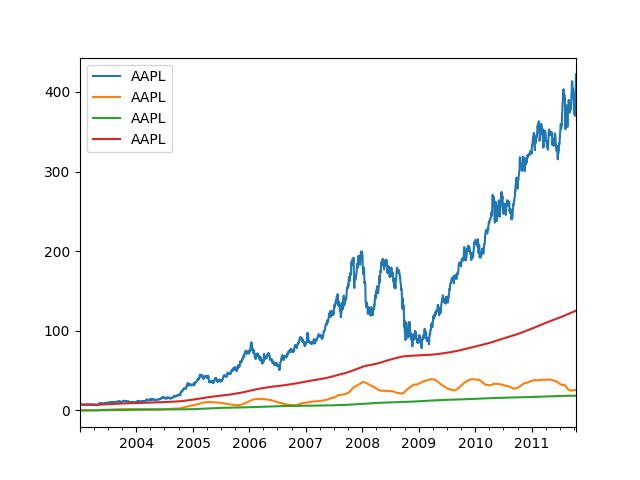

In [321]:
close_px.AAPL.plot();

In [322]:
apl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [323]:
apl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

In [324]:
apl_std250.plot()

<AxesSubplot:>

**`rolling`算子**， 行为与groupby和resample类似，**可以在Series和DataFrame上通过window进行调用**，**以一个区间的数字表示**

`rolling`行为与groupby类似，但是它创建的对象是**根据窗口大小滑动窗口分组**， 而不是直接分组

In [327]:
list( close_px.AAPL.rolling(250, min_periods=10))[:12]

[2003-01-02    7.4
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 2003-01-07    7.43
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 2003-01-07    7.43
 2003-01-08    7.28
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 2003-01-07    7.43
 2003-01-08    7.28
 2003-01-09    7.34
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 2003-01-07    7.43
 2003-01-08    7.28
 2003-01-09    7.34
 2003-01-10    7.36
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 2003-01-07    7.43
 2003-01-08    7.28
 2003-01-09    7.34
 2003-01-10    7.36
 2003-01-13    7.32
 Freq: B, Name:

In [337]:
 close_px.AAPL.rolling(250, min_periods=10).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    347.58772
2011-10-11    347.95668
2011-10-12    348.33412
2011-10-13    348.74688
2011-10-14    349.23096
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [330]:
list( close_px.AAPL.rolling(250, min_periods=10))[250]

2003-01-03     7.45
2003-01-06     7.45
2003-01-07     7.43
2003-01-08     7.28
2003-01-09     7.34
              ...  
2003-12-12    10.44
2003-12-15    10.09
2003-12-16    10.06
2003-12-17     9.94
2003-12-18    10.02
Freq: B, Name: AAPL, Length: 250, dtype: float64

计算**扩展窗口**均值，使用**`expanding`算子**，而不是`rolling`算子，扩展均值**从时间序列的起始位置开始时间窗口**， **并增大窗口大小，直到它覆盖整个序列**

In [331]:
expanding_mean = apl_std250.expanding().mean()

In [345]:
expanding_mean[248:252]

2003-12-16    0.906578
2003-12-17    0.909766
2003-12-18    0.912914
2003-12-19    0.916021
Freq: B, Name: AAPL, dtype: float64

In [332]:
expanding_mean.plot()

<AxesSubplot:>

In [335]:
close_px.AAPL.expanding().mean().plot()

<AxesSubplot:>

In [336]:
plt.legend()

`rolling`函数可以接受**固定大小的时间偏置字符串**，而不只是一个区间的集合数字；这对于不规则的时间序列非常有用

In [339]:
list(close_px.AAPL.rolling('20D'))[:20]

[2003-01-02    7.4
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 2003-01-07    7.43
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 2003-01-07    7.43
 2003-01-08    7.28
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 2003-01-07    7.43
 2003-01-08    7.28
 2003-01-09    7.34
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 2003-01-07    7.43
 2003-01-08    7.28
 2003-01-09    7.34
 2003-01-10    7.36
 Freq: B, Name: AAPL, dtype: float64,
 2003-01-02    7.40
 2003-01-03    7.45
 2003-01-06    7.45
 2003-01-07    7.43
 2003-01-08    7.28
 2003-01-09    7.34
 2003-01-10    7.36
 2003-01-13    7.32
 Freq: B, Name:

In [341]:
close_px.AAPL.rolling('20D').count()

2003-01-02     1.0
2003-01-03     2.0
2003-01-06     3.0
2003-01-07     4.0
2003-01-08     5.0
              ... 
2011-10-10    14.0
2011-10-11    14.0
2011-10-12    14.0
2011-10-13    14.0
2011-10-14    15.0
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [342]:
close_px.AAPL.rolling(20).count()

2003-01-02     1.0
2003-01-03     2.0
2003-01-06     3.0
2003-01-07     4.0
2003-01-08     5.0
              ... 
2011-10-10    20.0
2011-10-11    20.0
2011-10-12    20.0
2011-10-13    20.0
2011-10-14    20.0
Freq: B, Name: AAPL, Length: 2292, dtype: float64

### 指数加权函数

指定一个“**常数衰减因子**”以**向更多近期观测值提供更多权重**，可以替代使用具有相等加权观察值的**静态窗口尺寸**的方法

有多重方法可以指定衰减因子，一种流行的是使用`span`**跨度**，使得**结果与窗口大小等于跨度**的简单易移动窗口函数

`pandas`提供`ewm`算子，与rolling,expanding算子一起使用

![spn=30](https://gitee.com/zhao_long/image-store/raw/master/img/20201118124905.png)

In [354]:
plt.close('all')

In [347]:
appl_px = close_px.AAPL['2006':'2007']
appl_px

2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
               ...  
2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [348]:
ma60 = appl_px.rolling(30, min_periods=20).mean()

<IPython.core.display.Javascript object>


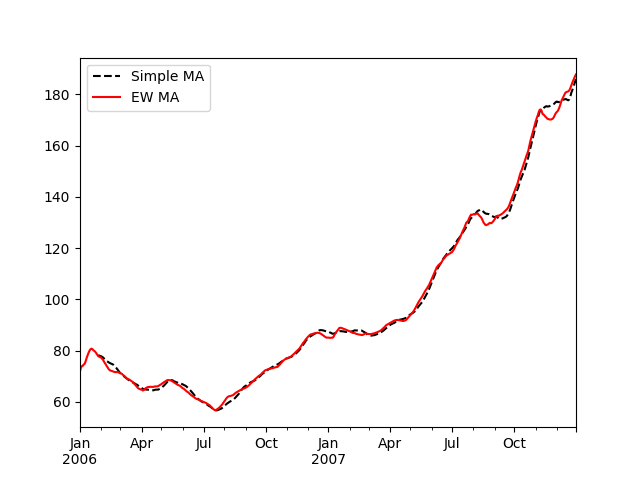

<AxesSubplot:>

In [350]:
ma60.plot(style='k--', label='Simple MA')

In [351]:
ewm60 = appl_px.ewm( span=30).mean()

In [352]:
ewm60.plot(style='r-', label='EW MA')

<AxesSubplot:>

In [353]:
plt.legend();

### 二元移动窗口函数

一些统计算子，例如相关性和协方差，**需要操作两个时间序列**

In [355]:
spx_px = close_px_all['SPX']
spx_px

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

In [356]:
spx_rets = spx_px.pct_change()
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [358]:
result = close_px.pct_change()
result

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


In [359]:
corr = result.AAPL.rolling(125, min_periods=100).corr(spx_rets)

In [362]:
corr[99:105]

2003-05-21         NaN
2003-05-22         NaN
2003-05-23         NaN
2003-05-26         NaN
2003-05-27         NaN
2003-05-28    0.536726
dtype: float64

In [369]:
plt.close('all')

<IPython.core.display.Javascript object>


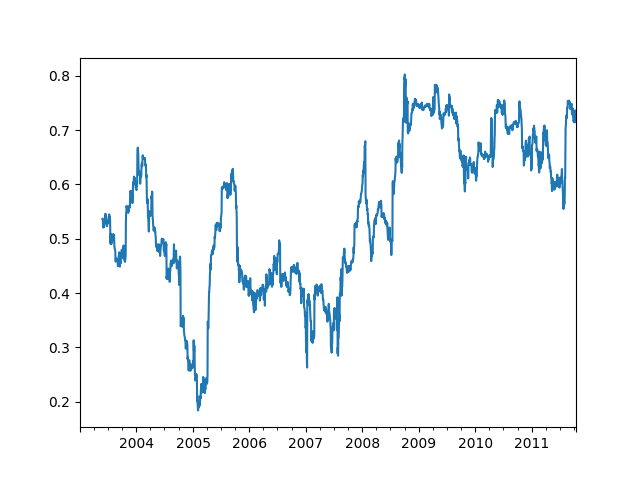

<AxesSubplot:>

In [364]:
corr.plot()

In [366]:
corr = result.rolling(125, min_periods=100).corr(spx_rets)

<IPython.core.display.Javascript object>


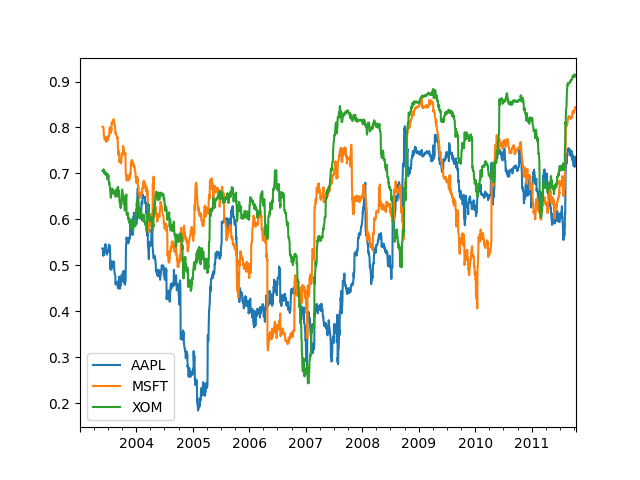

<AxesSubplot:>

In [367]:
corr.plot()

### 用户自定义的移动窗口函数

在`rolling`及其相关方法上使用`apply`提供了一种在移动窗口中**应用自己设计的数组函数的方法**， 唯一的要求是该函数*从每个数组中产生一个单值*

使用`rolling(...).quantile(q)`计算样本分位数

In [368]:
from scipy.stats import percentileofscore

<IPython.core.display.Javascript object>


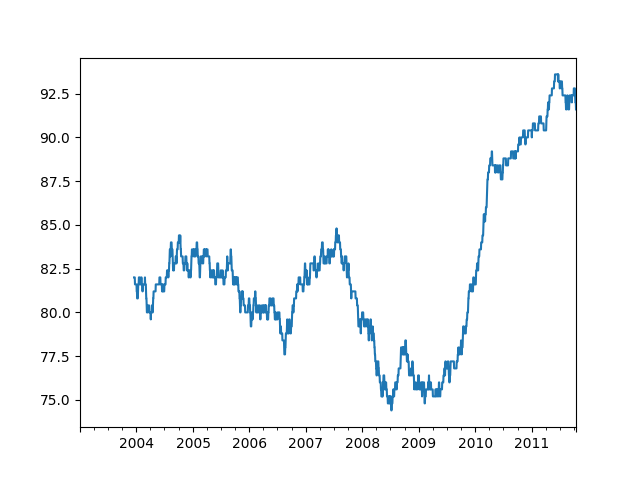

<AxesSubplot:>

In [371]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = result.AAPL.rolling(250).apply(score_at_2percent)
result.plot()